In [3]:
import sys
from pathlib import Path

# path_to_your_local_folder = Path("/Users/marco/Work-MBP/gtfs_railways")
path_to_your_local_folder = Path("C:/Users/KIIT/Documents/UAntwerp/railways_resilience")
sys.path.append(str(path_to_your_local_folder))

from utils.imports import *

Loading BokehJS ...

In [4]:
from config import PATH_TO_SQLITE
attributes = load_gtfs(str(PATH_TO_SQLITE))
L_graph = load_graph(L_SPACE_PATH)
# L_graph=load_graph(DATA_DIR / "pkl/nl_merged.pkl")

## Nodes

In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

def compute_connectivity_metrics(df, G):
    """Compute SCC, WCC, largest SCC, and largest WCC as nodes are progressively edge-removed."""
    
    G = G.copy()
    N = G.number_of_nodes()
    
    num_scc = []
    num_wcc = []
    largest_scc_norm = []
    largest_wcc_norm = []

    for _, row in df.iterrows():
        
        # SCC and WCC counts
        num_scc.append(nx.number_strongly_connected_components(G))
        num_wcc.append(nx.number_weakly_connected_components(G))

        # Largest SCC
        sccs = nx.strongly_connected_components(G)
        largest_scc = max((len(c) for c in sccs), default=0)
        largest_scc_norm.append(largest_scc / N)

        # Largest WCC
        wccs = nx.weakly_connected_components(G)
        largest_wcc = max((len(c) for c in wccs), default=0)
        largest_wcc_norm.append(largest_wcc / N)

        # Remove edges of node
        node = row.get('removed_node')
        if pd.notna(node):
            node = int(node)
            if node in G:
                G.remove_edges_from(list(G.out_edges(node)))
                G.remove_edges_from(list(G.in_edges(node)))

    df['num_strong_components'] = num_scc
    df['num_weak_components'] = num_wcc
    df['largest_scc_normalized'] = largest_scc_norm
    df['largest_wcc_normalized'] = largest_wcc_norm

    return df


def plot_efficiency_comparison_single(run_configs, title, xlim=None):
    plt.figure(figsize=(16, 14))

    metrics = [
        ('normalized_efficiency', 'Normalized Efficiency'),
        ('num_strong_components', 'Strong Components'),
        ('num_weak_components', 'Weak Components'),
        ('largest_scc_normalized', 'Largest SCC'),
        ('largest_wcc_normalized', 'Largest WCC')
    ]

    # 1. Load + compute metrics for each run
    processed_runs = []

    for cfg in run_configs:
        df = load_removal_results_df(cfg['fil'])

        # You already have L_graph globally or can modify this param
        df = compute_connectivity_metrics(df, L_graph)

        processed_runs.append((df, cfg['color'], cfg['label']))

    # 2. Plot

    # Full width first plot
    plt.subplot(3, 2, (1, 2))
    col, ttl = metrics[0]
    for df, color, label in processed_runs:
        plt.plot(df['percent_remaining'], df[col], 'o-', linewidth=2, markersize=4, color=color, label=label)
    plt.title(ttl)
    plt.xlabel('Percent Remaining')
    plt.ylabel(ttl)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    if xlim:
        plt.xlim(xlim)
    plt.gca().invert_xaxis()

    # Remaining 4 plots
    for i, (col, ttl) in enumerate(metrics[1:], start=3):
        plt.subplot(3, 2, i)
        for df, color, label in processed_runs:
            plt.plot(df['percent_remaining'], df[col], 'o-', linewidth=2, markersize=4, color=color, label=label)
        plt.title(ttl)
        plt.xlabel('Percent Remaining')
        plt.ylabel(ttl)
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.legend()
        if xlim:
            plt.xlim(xlim)
        plt.gca().invert_xaxis()

    plt.suptitle(title, fontsize=18)
    plt.tight_layout()
    plt.show()


### Targeted Removal

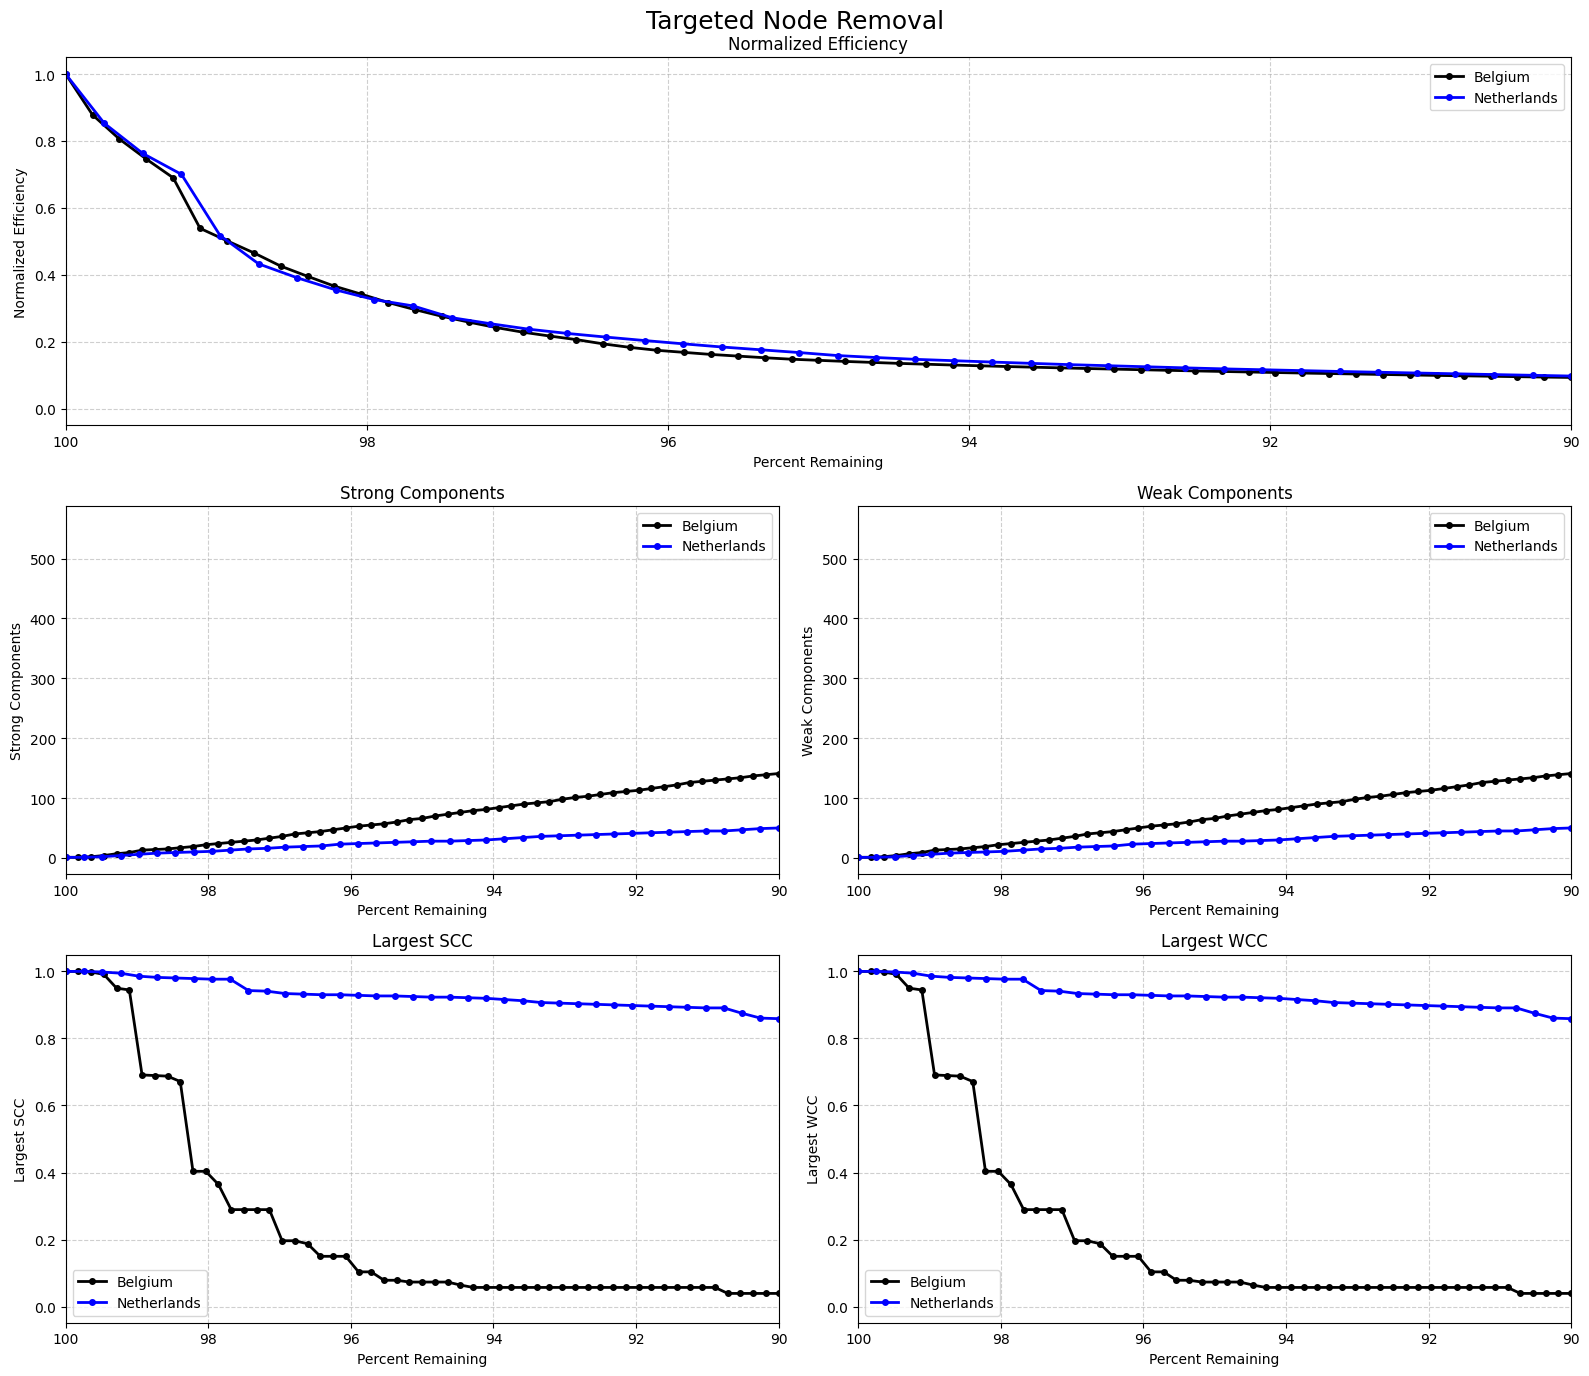

In [14]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_targeted_node_BE/targeted_removal_seed42_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_targeted_node_NL/targeted_removal_seed42_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Targeted Node Removal",
    xlim=(90,100)
)

### Betweenness Weighted

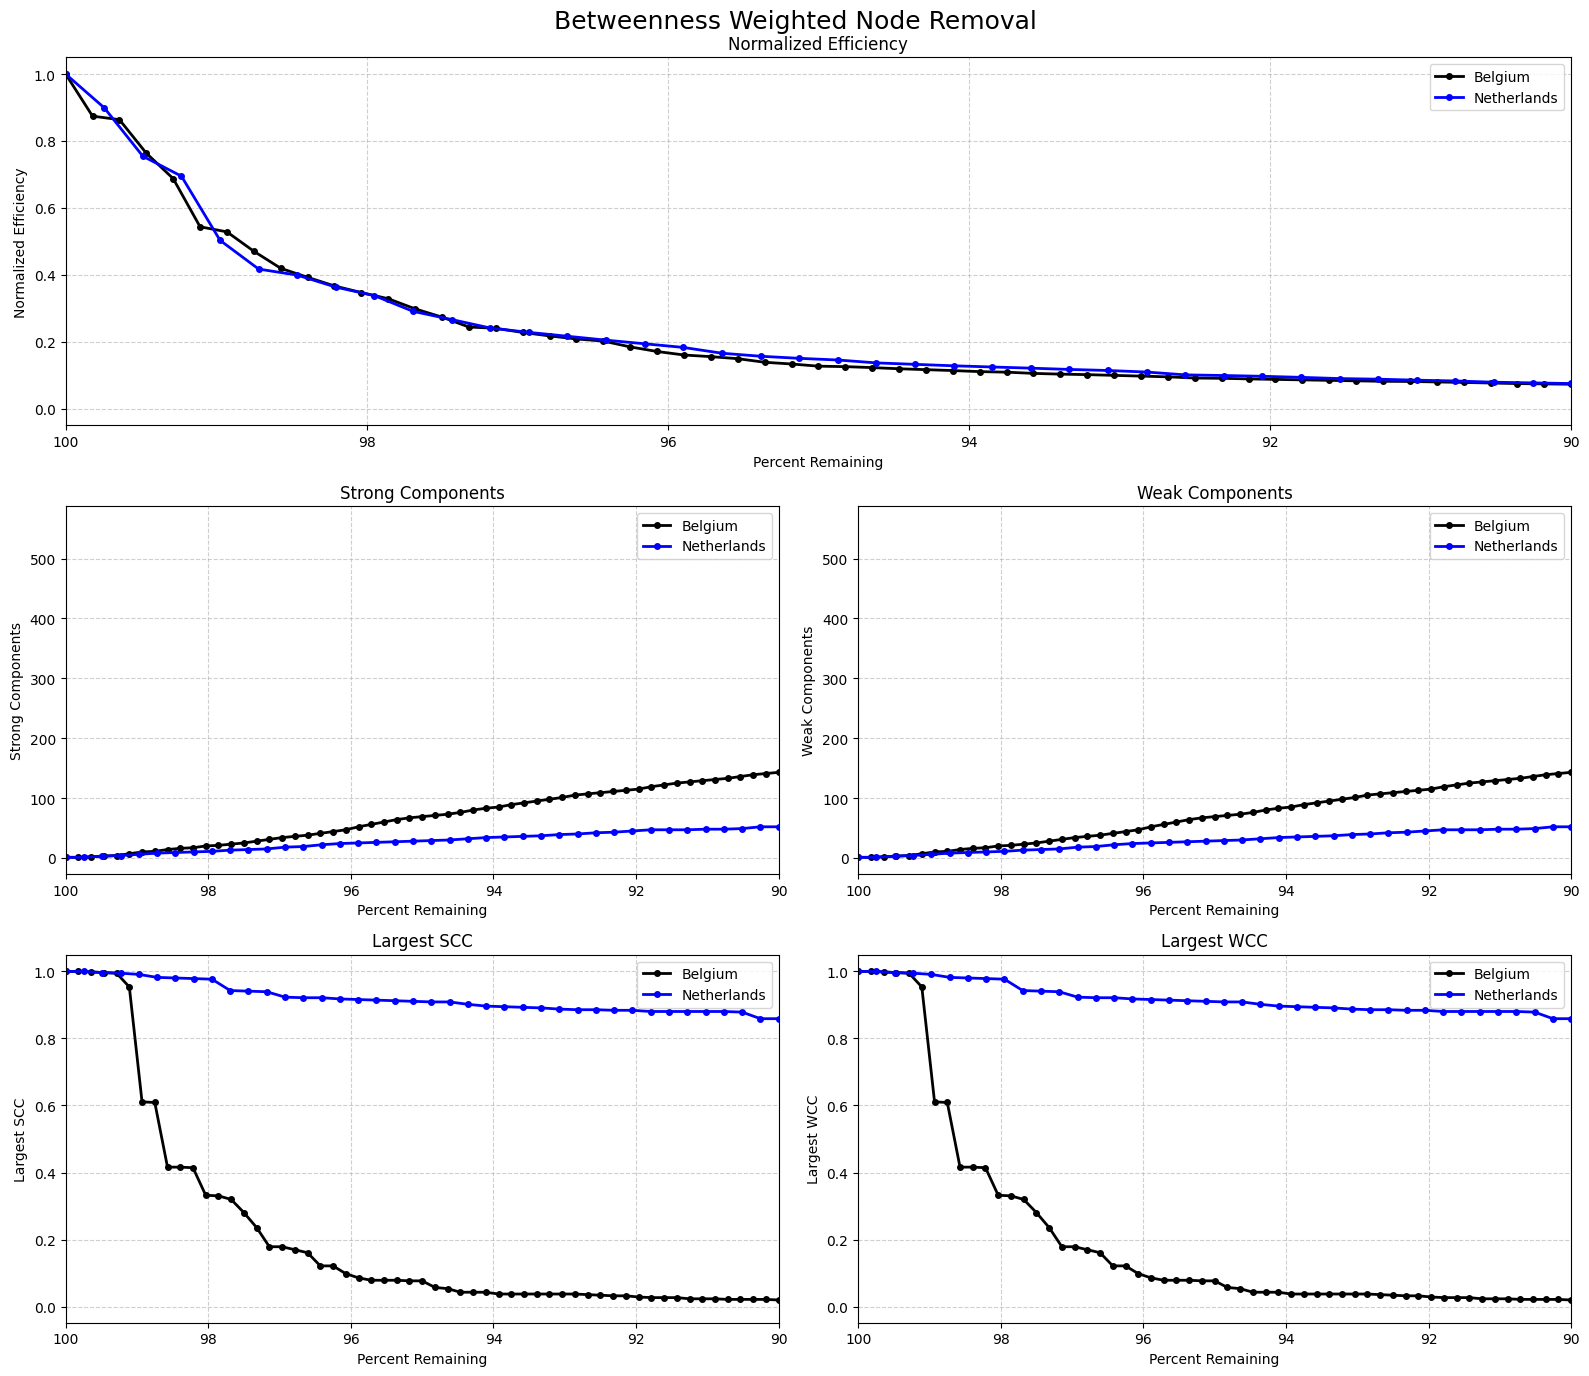

In [15]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_weighted_node_BE/betweenness_weighted_removal_seed42_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_weighted_node_NL/betweenness_weighted_removal_seed42_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Betweenness Weighted Node Removal",
    xlim=(90, 100)
)

### Betweenness Weighted Least

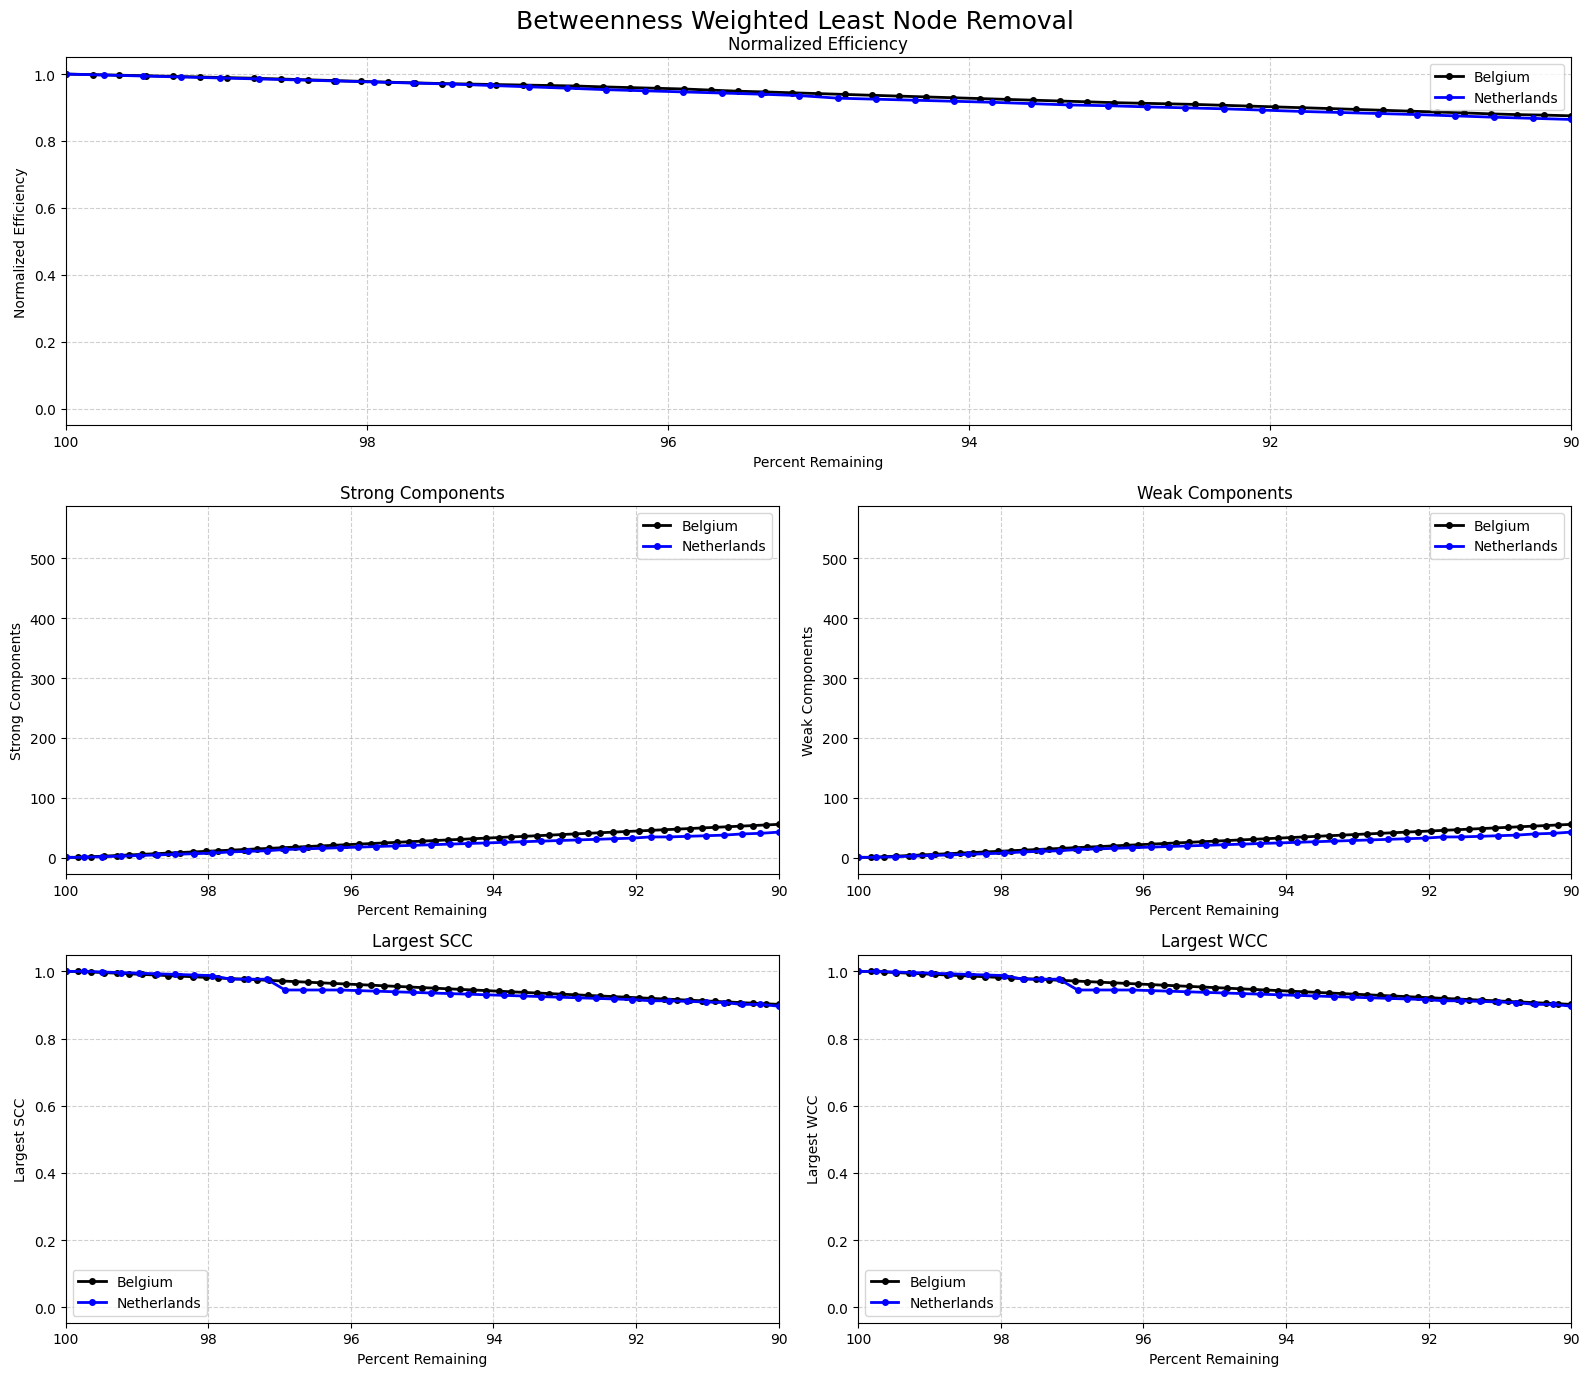

In [17]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_weighted_least_node_BE/betweenness_weighted_least_removal_seed42_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_weighted_least_node_NL/betweenness_weighted_least_removal_seed42_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Betweenness Weighted Least Node Removal",
    xlim=(90, 100)
)

### Betweennees Unweighted

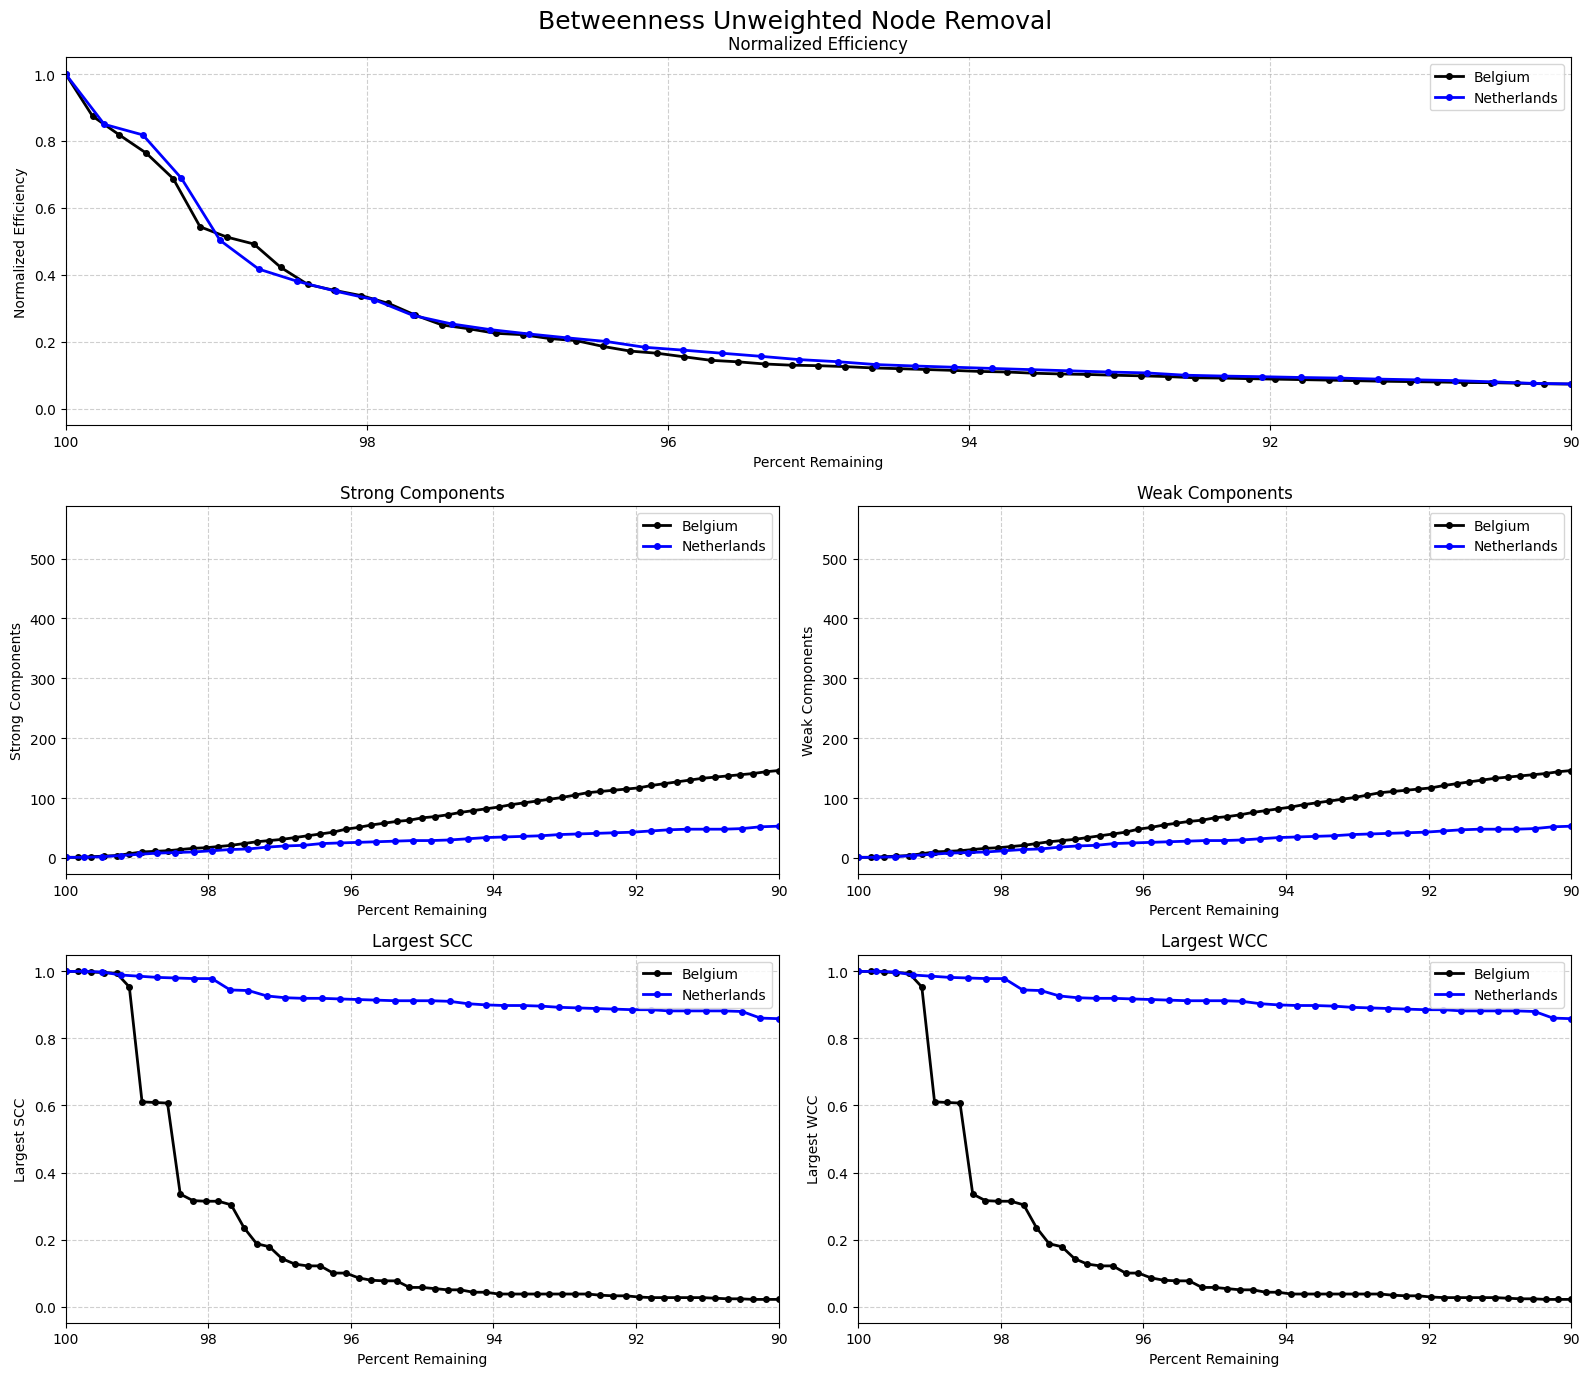

In [18]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_unweighted_node_BE/betweenness_unweighted_removal_seed42_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_unweighted_node_NL/betweenness_unweighted_removal_seed42_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Betweenness Unweighted Node Removal",
    xlim=(90, 100)
)

### Betweenneess Unweighted Least

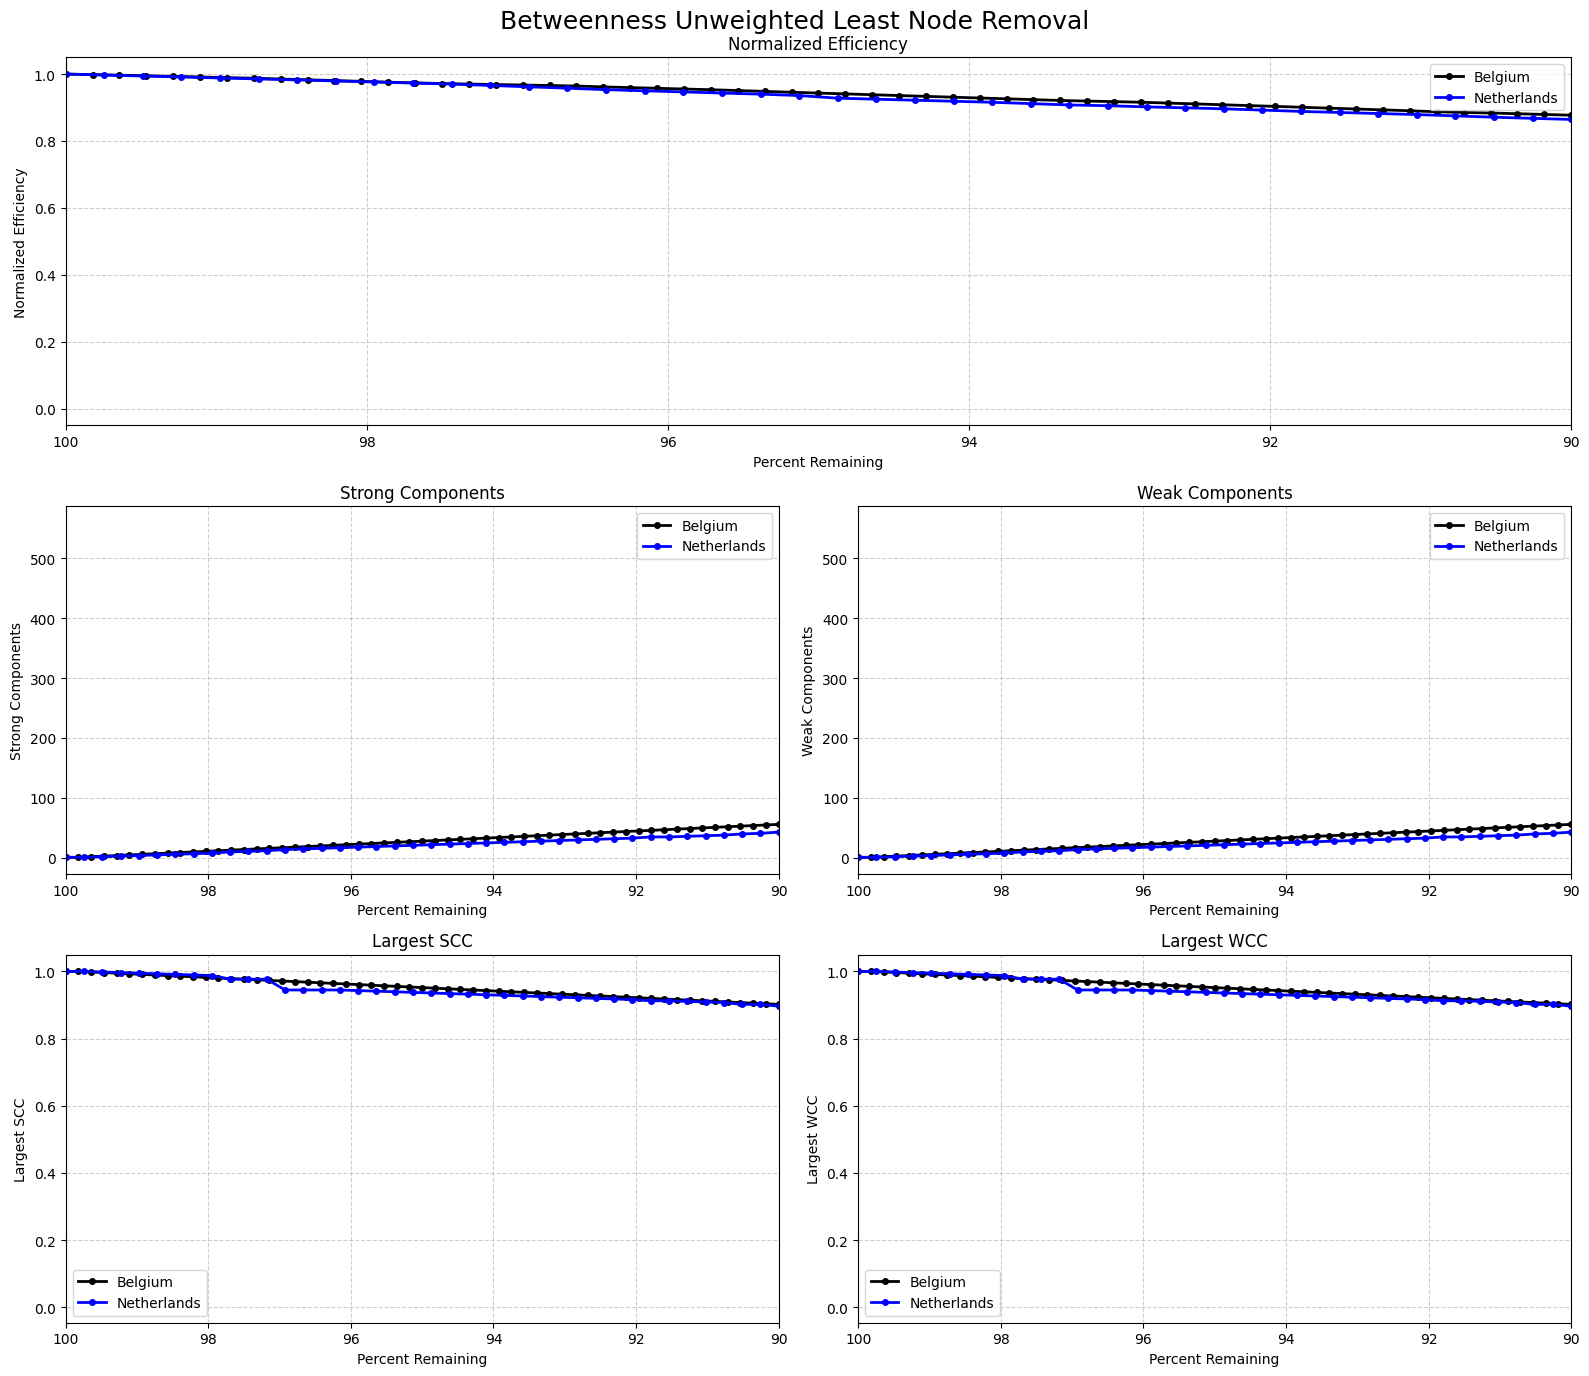

In [19]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_unweighted_least_node_BE/betweenness_unweighted_least_removal_seed42_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_betweenness_unweighted_least_node_NL/betweenness_unweighted_least_removal_seed42_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Betweenness Unweighted Least Node Removal",
    xlim=(90, 100)
)

### Top Hubs (Connections)

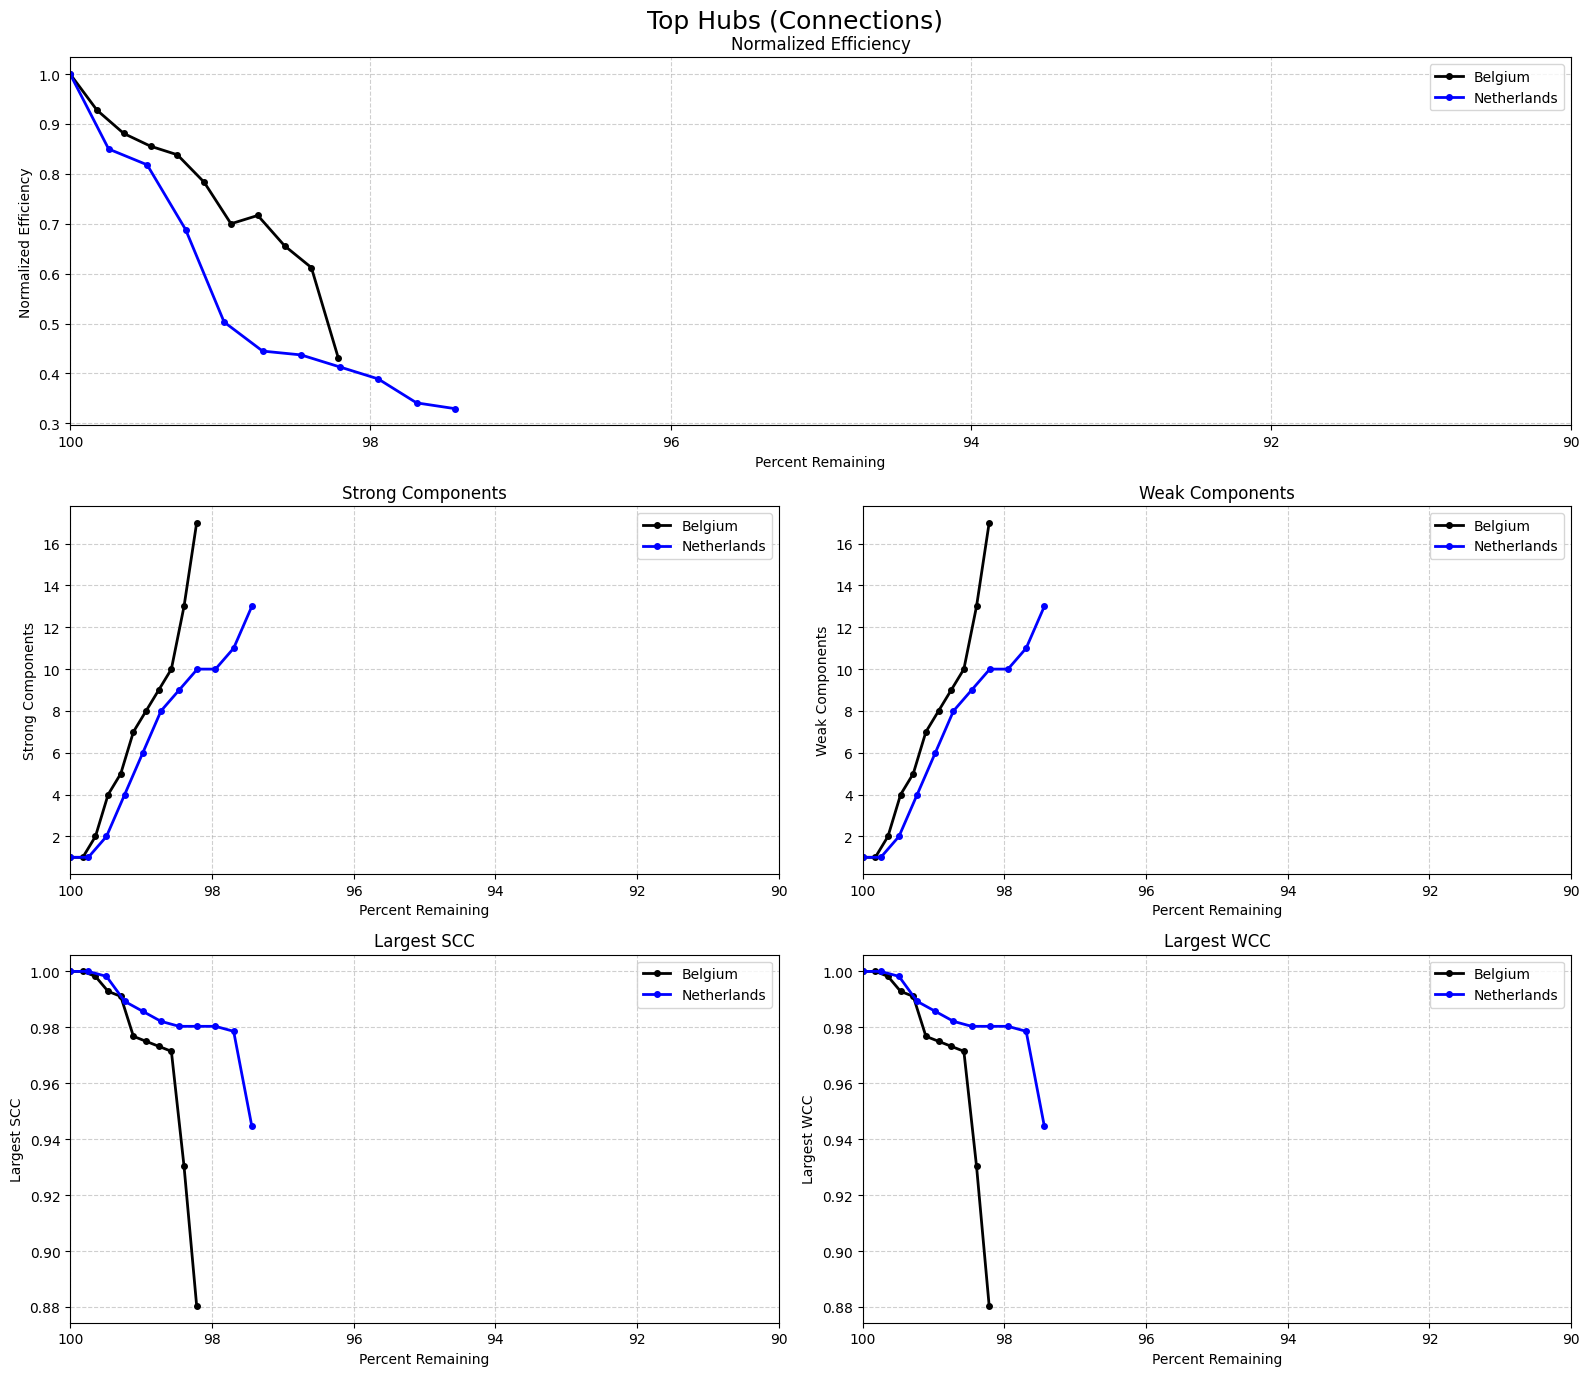

In [20]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_tophubs_node_BE/tophub_removal_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_tophubs_node_NL/tophub_removal_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Top Hubs (Connections)",
    xlim=(90, 100)
)

### Top Hubs (Train Frequency)

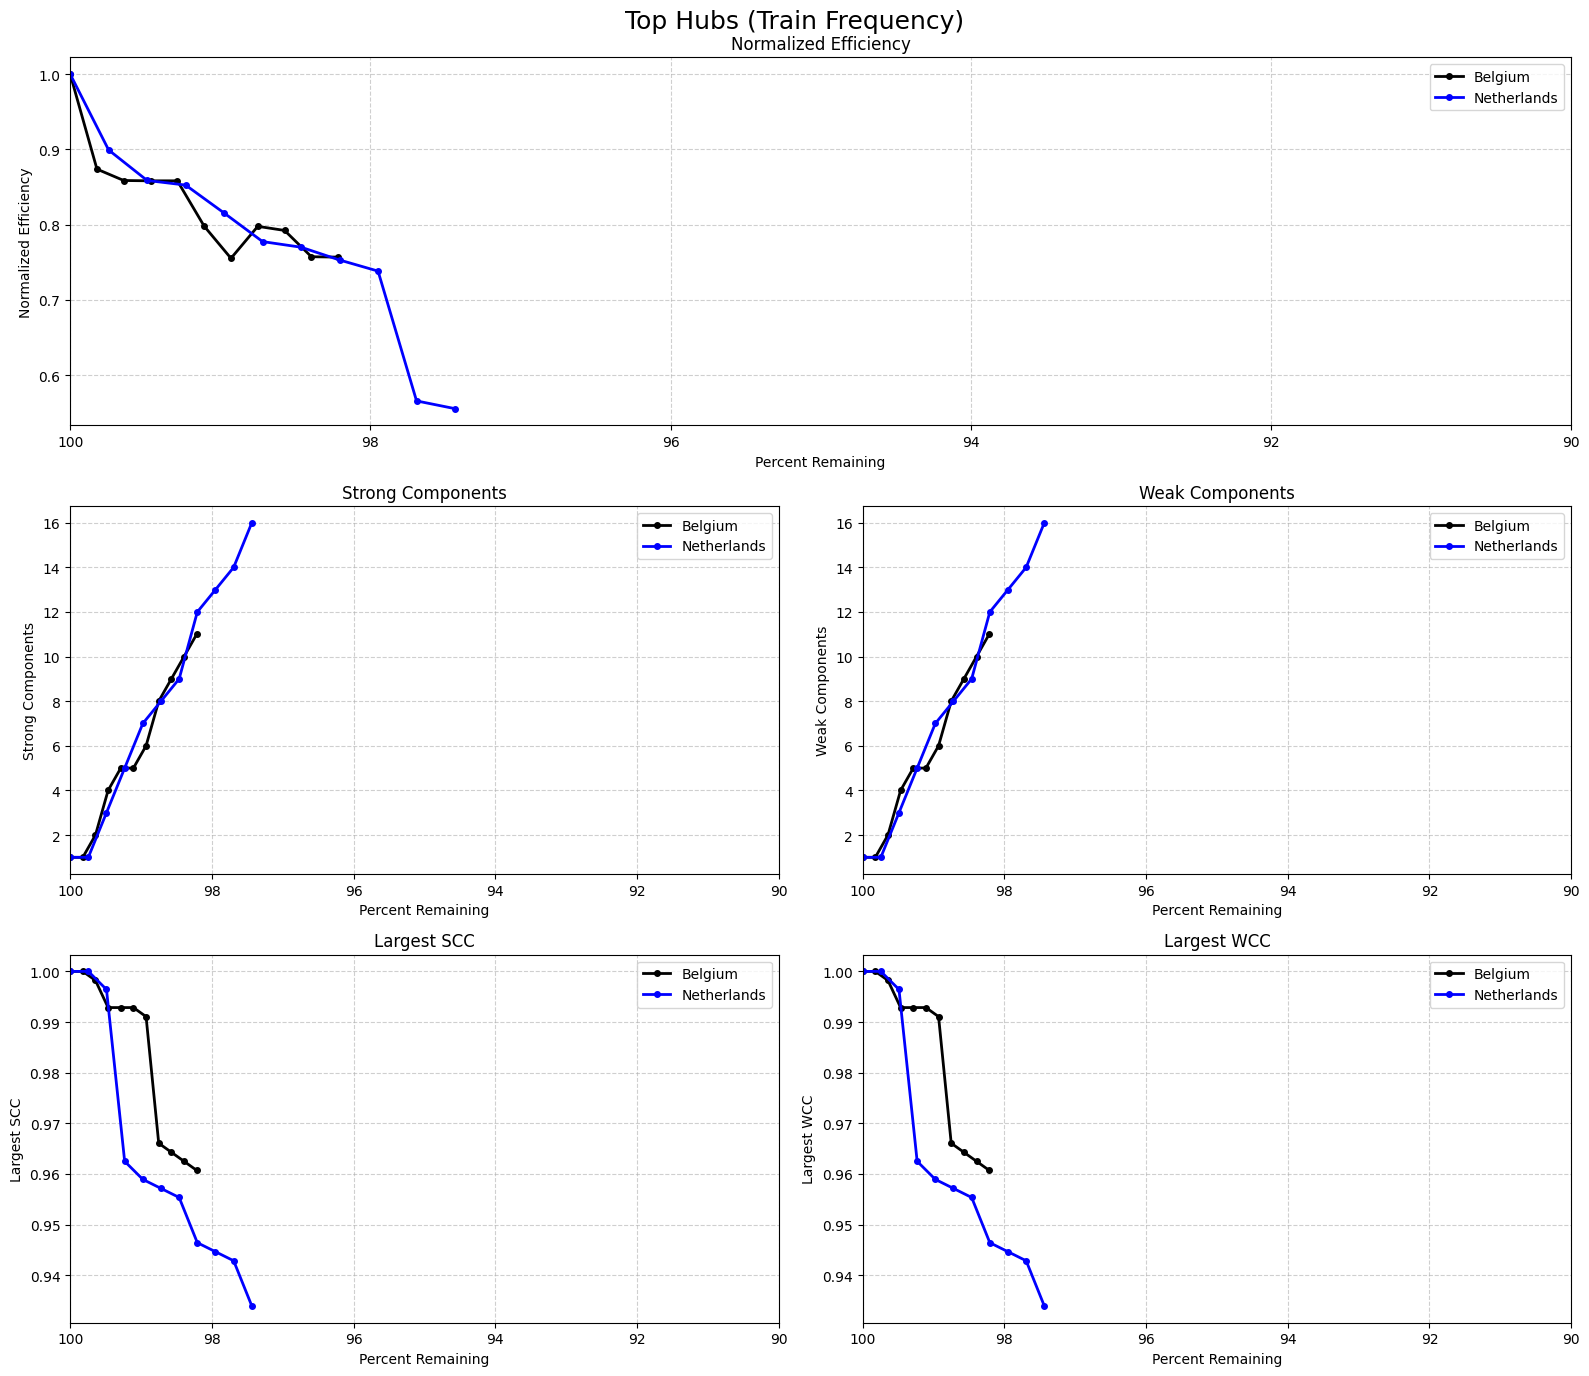

In [21]:
run_configs = [
    {
        'fil': DATA_DIR / "results/removal_runs_tophubs_trains_BE/tophub_removal_nodes560.csv",
        'color': 'black',
        'label': 'Belgium'
    },
    {
        'fil': DATA_DIR / "results/removal_runs_tophubs_trains_NL/tophub_removal_nodes390.csv",
        'color': 'blue',
        'label': 'Netherlands'
    }
]

plot_efficiency_comparison_single(
    run_configs,
    title="Top Hubs (Train Frequency)",
    xlim=(90, 100)
)

## Edges

In [ ]:
# results_path = DATA_DIR / "results/removal_runs_targeted_edge_BE/targeted_removal_seed42_edges1230.csv"
results_path = DATA_DIR / "results/removal_runs_targeted_edge_NL/targeted_removal_seed42_edges854.csv"

df = load_removal_results_df(results_path)
plot_efficiency_from_loaded_df(df, 854)

In [45]:
import networkx as nx
import pandas as pd
import ast

# Make a fresh copy of the graph
G = L_graph.copy()
N = G.number_of_nodes()  # original number of nodes

# Convert string representations of edges to actual tuples
df['removed_node'] = df['removed_node'].apply(
    lambda x: ast.literal_eval(x) if isinstance(x, str) else None
)

# Initialize lists to store results
num_strong_components = []
num_weak_components = []
largest_scc_normalized = []
largest_wcc_normalized = []

# Iterate over the DataFrame rows
for _, row in df.iterrows():
    # Compute component counts BEFORE removing the edge
    if G.is_directed():
        num_strong_components.append(nx.number_strongly_connected_components(G))
        num_weak_components.append(nx.number_weakly_connected_components(G))

        sccs = nx.strongly_connected_components(G)
        wccs = nx.weakly_connected_components(G)
        largest_scc_normalized.append(max(len(c) for c in sccs) / N)
        largest_wcc_normalized.append(max(len(c) for c in wccs) / N)
    else:
        num_strong_components.append(None)
        num_weak_components.append(nx.number_connected_components(G))
        cc = nx.connected_components(G)
        largest_scc_normalized.append(None)
        largest_wcc_normalized.append(max(len(c) for c in cc) / N)

    # Remove the edge safely
    edge = row['removed_node']
    if isinstance(edge, tuple):
        u, v = edge
        if G.has_edge(u, v):
            G.remove_edge(u, v)
        elif G.is_directed() and G.has_edge(v, u):
            G.remove_edge(v, u)

# Add results back to the DataFrame
df['num_strong_components'] = num_strong_components
df['num_weak_components'] = num_weak_components
df['largest_scc_normalized'] = largest_scc_normalized
df['largest_wcc_normalized'] = largest_wcc_normalized

# Inspect the first rows
df


step removed_node  normalized_efficiency  percent_remaining  \
0       0         None               1.000000         100.000000   
1       1     (52, 51)               0.938160          99.882904   
2       2     (51, 52)               0.876778          99.765808   
3       3      (31, 9)               0.840648          99.648712   
4       4    (67, 349)               0.807296          99.531616   
..    ...          ...                    ...                ...   
166   166    (245, 65)               0.080240          80.562061   
167   167    (129, 64)               0.079721          80.444965   
168   168    (65, 245)               0.079204          80.327869   
169   169   (260, 259)               0.078688          80.210773   
170   170   (268, 269)               0.078172          80.093677   

     removal_time_seconds  num_strong_components  num_weak_components  \
0                  0.0000                      1                    1   
1               2044.8268                      1                    1   
2               1810.7196                      2                    1   
3               1586.7274                      2                    2   
4               1531.1344                      2                    2   
..                    ...                    ...                  ...   
166              135.0287                     91                   25   
167              134.0777                     92                   25   
168              133.4996                     93                   25   
169              133.2533                     93                   26   
170              132.3505                     94                   26   

     largest_scc_normalized  largest_wcc_normalized  
0                  1.000000                1.000000  
1                  1.000000                1.000000  
2                  0.866667                1.000000  
3                  0.866667                0.866667  
4                  0.866667                0.866667  
..                      ...                     ...  
166                0.053846                0.238462  
167                0.048718                0.238462  
168                0.048718                0.238462  
169                0.048718                0.238462  
170                0.048718                0.238462  

[171 rows x 9 columns]

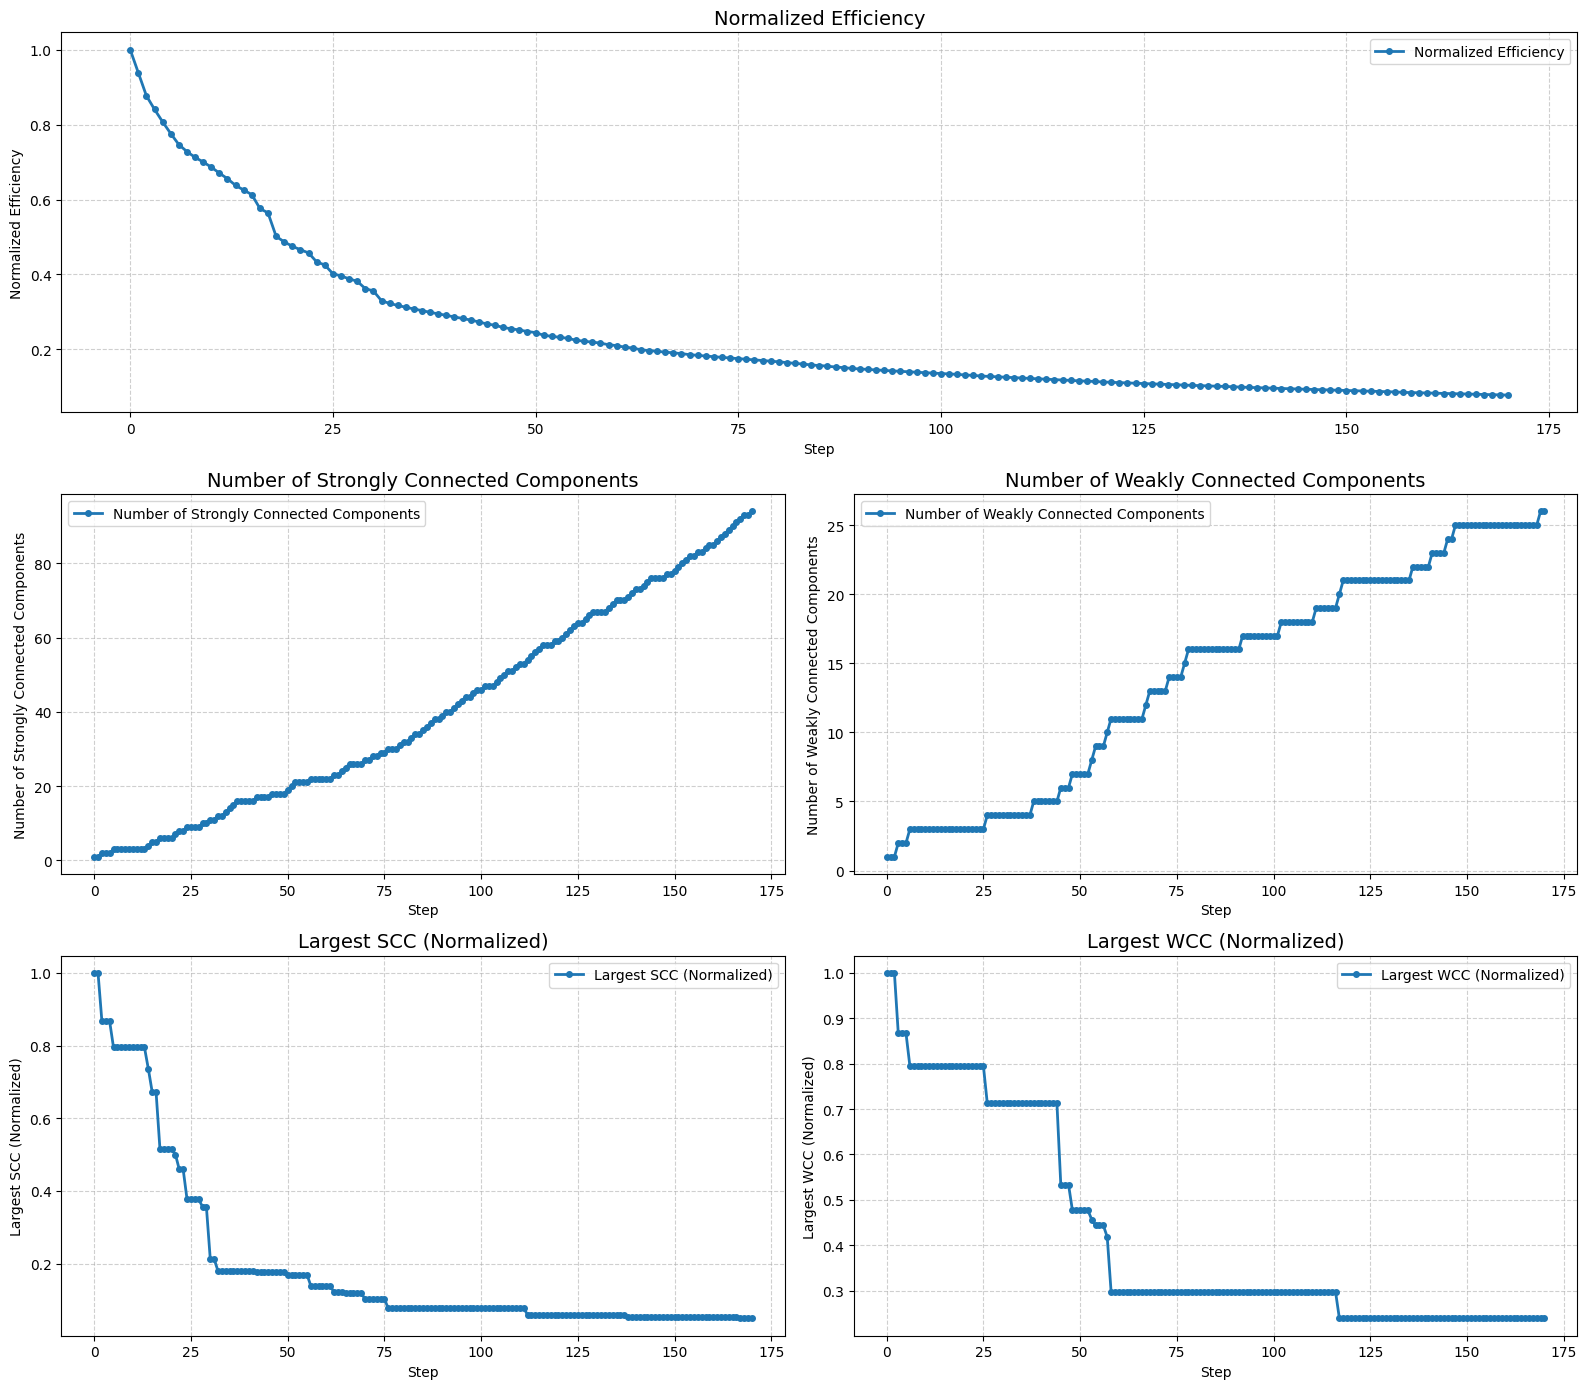

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 14))

# Define the metrics and titles in the order you want
metrics = [
    ('normalized_efficiency', 'Normalized Efficiency'),
    ('num_strong_components', 'Number of Strongly Connected Components'),
    ('num_weak_components', 'Number of Weakly Connected Components'),
    ('largest_scc_normalized', 'Largest SCC (Normalized)'),
    ('largest_wcc_normalized', 'Largest WCC (Normalized)')
]

# --- Plot 1 (full width) ---
plt.subplot(3, 2, (1, 2))
col, title = metrics[0]
plt.plot(df['step'], df[col], '-o', label=title, linewidth=2, markersize=4)
plt.title(title, fontsize=14)
plt.xlabel('Step')
plt.ylabel(title)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# --- Plot 2x2 below ---
for i, (col, title) in enumerate(metrics[1:], start=3):
    plt.subplot(3, 2, i)
    plt.plot(df['step'], df[col], '-o', label=title, linewidth=2, markersize=4)
    plt.title(title, fontsize=14)
    plt.xlabel('Step')
    plt.ylabel(title)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()

plt.tight_layout()
plt.show()


## Testing Stuff

In [17]:
import ast

df = load_removal_results_df(results_path)
# Convert first 10 edges from string to tuple
edges_to_remove = [ast.literal_eval(e) for e in df['removed_node'].dropna()]

# Inspect
print("Edges to remove:", edges_to_remove)


Edges to remove: []


In [ ]:
test = L_graph.copy()  # fresh copy

for edge in edges_to_remove:
    u, v = edge
    # Directed graph: check both directions if necessary
    if test.has_edge(u, v):
        test.remove_edge(u, v)
    elif test.is_directed() and test.has_edge(v, u):
        test.remove_edge(v, u)

print("Number of edges before:", L_graph.number_of_edges())
print("Number of edges after:", test.number_of_edges())


In [139]:
plot_graph(test, back_map="OSM")

In [140]:
print(nx.number_strongly_connected_components(test))
print(nx.number_weakly_connected_components(test))

147
20


In [33]:
import networkx as nx

subgraphs = load_all_subgraphs(DATA_DIR / "pkl" / "belgium", 5)
subgraph = subgraphs[20][0]
plot_graph(subgraph, back_map="OSM")

num_scc = nx.number_strongly_connected_components(subgraph)
num_wcc = nx.number_weakly_connected_components(subgraph)

print(f"Nodes: {subgraph.number_of_nodes()}, Edges: {subgraph.number_of_edges()}")
print(f"SCC: {num_scc}, WCC: {num_wcc}")

Nodes: 20, Edges: 40
SCC: 1, WCC: 1


In [35]:
subgraph = remove_node_edges_and_plot(subgraph, [423])
plot_graph(subgraph, back_map="OSM")

num_scc = nx.number_strongly_connected_components(subgraph)
num_wcc = nx.number_weakly_connected_components(subgraph)

print(f"Nodes: {subgraph.number_of_nodes()}, Edges: {subgraph.number_of_edges()}")
print(f"SCC: {num_scc}, WCC: {num_wcc}")

Nodes: 20, Edges: 38
SCC: 2, WCC: 2
